In [9]:
# First, install the autoreload extension
%load_ext autoreload
# Set autoreload to automatically reload modules
%autoreload 2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from algorithm import CR_0_20240118 as CR
from algorithm import CR_baseline_0_20240118 as CR_baseline
from algorithm import CR_vinilla_method_0 as CR_vinilla_method
from algorithm import CR_workload as workload





The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [63]:
    
data = pd.read_csv('../../../data/compas/preprocessed/cox-parsed_7214rows_with_labels_sorted_by_dates.csv')
print(data["race"].unique())
# get distribution of compas_screening_date
data['compas_screening_date'] = pd.to_datetime(data['compas_screening_date'])
# data['compas_screening_date'].hist()
date_column = "compas_screening_date"
time_window_str = "1 month"
monitored_groups = [{"race": 'Caucasian'}, {"race": 'African-American'}, {"race": "Asian"}, {"race": "Hispanic"}, {"race": "Other"}, {"race": "Native American"}]
alpha = 0.5
threshold = 0.3


# use CR for compas dataset, a time window = 1 month, record the result of each uf in each month and draw a plot
DFMonitor, uf_list = workload.traverse_data_DFMonitor(data, date_column, time_window_str, monitored_groups, threshold, alpha)


['Caucasian' 'African-American' 'Other' 'Hispanic' 'Asian'
 'Native American']


In [64]:
uf_list

[[False, False, False, False, False, False],
 [False, False, True, True, True, True],
 [False, False, True, True, True, True],
 [False, False, True, True, True, True],
 [False, False, True, True, True, True],
 [False, False, True, True, True, True],
 [False, False, True, True, True, True],
 [False, False, True, True, True, True],
 [False, False, True, True, True, True],
 [False, False, True, True, True, True],
 [False, False, True, True, True, True],
 [False, False, True, True, True, True],
 [False, False, True, True, True, True],
 [False, False, True, True, True, True],
 [False, False, True, True, True, True],
 [False, False, True, True, True, True],
 [False, False, True, True, True, True],
 [True, False, True, True, True, True],
 [False, False, True, True, True, True],
 [True, False, True, True, True, True],
 [True, False, True, True, True, True],
 [False, False, True, True, True, True],
 [False, False, True, True, True, True]]

In [65]:
DFMonitor_baseline, base_uf_list, base_counters, base_cr_list = workload.traverse_data_DFMonitor_baseline(data, date_column, time_window_str, monitored_groups, threshold, alpha)
base_cr_list

[[0.33166666666666667,
  0.5416666666666666,
  0.006666666666666667,
  0.07333333333333333,
  0.045,
  0.0016666666666666668],
 [0.30174418604651165,
  0.547093023255814,
  0.005813953488372093,
  0.09186046511627907,
  0.05058139534883721,
  0.0029069767441860465],
 [0.3243447580645161,
  0.5335181451612904,
  0.005544354838709678,
  0.08316532258064516,
  0.05115927419354839,
  0.0022681451612903227],
 [0.33415262172284643,
  0.5230571161048689,
  0.0035112359550561797,
  0.0929307116104869,
  0.04342228464419476,
  0.0029260299625468167],
 [0.33509185700099303,
  0.5166956305858987,
  0.003848063555114201,
  0.08800893743793446,
  0.0548038728897716,
  0.001551638530287984],
 [0.3337025316455696,
  0.4981540084388186,
  0.003270042194092827,
  0.1119198312236287,
  0.051635021097046416,
  0.0013185654008438818],
 [0.38199485783424075,
  0.4539095583787054,
  0.0023442226255293405,
  0.10927102238354507,
  0.051535087719298246,
  0.0009452510586811857],
 [0.3471468640794556,
  0.4881

In [66]:
base_counters

[[199, 325, 4, 44, 27, 1],
 [259.5, 470.5, 5.0, 79.0, 43.5, 2.5],
 [321.75, 529.25, 5.5, 82.5, 50.75, 2.25],
 [356.875, 558.625, 3.75, 99.25, 46.375, 3.125],
 [337.4375, 520.3125, 3.875, 88.625, 55.1875, 1.5625],
 [197.71875, 295.15625, 1.9375, 66.3125, 30.59375, 0.78125],
 [157.859375, 187.578125, 0.96875, 45.15625, 21.296875, 0.390625],
 [235.9296875, 331.7890625, 1.484375, 71.578125, 38.6484375, 0.1953125],
 [267.96484375, 387.89453125, 3.7421875, 77.7890625, 47.32421875, 2.09765625],
 [274.982421875,
  428.947265625,
  3.87109375,
  73.89453125,
  49.662109375,
  3.048828125],
 [258.4912109375,
  382.4736328125,
  3.935546875,
  60.947265625,
  45.8310546875,
  3.5244140625],
 [309.24560546875,
  383.23681640625,
  5.9677734375,
  64.4736328125,
  50.91552734375,
  2.76220703125],
 [300.622802734375,
  383.618408203125,
  3.98388671875,
  61.23681640625,
  47.457763671875,
  2.381103515625],
 [270.3114013671875,
  380.8092041015625,
  2.991943359375,
  63.618408203125,
  45.7288818

In [67]:


seperate_counter_list, seperate_cr_list, seperate_uf_list = workload.CR_each_window_seperately(data, date_column, time_window_str, monitored_groups,
                                                           threshold)

print(seperate_cr_list)

[[0.33166666666666667, 0.5416666666666666, 0.006666666666666667, 0.07333333333333333, 0.045, 0.0016666666666666668], [0.2857142857142857, 0.55, 0.005357142857142857, 0.10178571428571428, 0.05357142857142857, 0.0035714285714285713], [0.3416370106761566, 0.5231316725978647, 0.005338078291814947, 0.07651245551601424, 0.051601423487544484, 0.0017793594306049821], [0.34265734265734266, 0.513986013986014, 0.0017482517482517483, 0.10139860139860139, 0.03671328671328671, 0.0034965034965034965], [0.3361522198731501, 0.5095137420718816, 0.004228329809725159, 0.0824524312896406, 0.06765327695560254, 0.0], [0.3258426966292135, 0.39325842696629215, 0.0, 0.24719101123595505, 0.033707865168539325, 0.0], [0.5042735042735043, 0.3418803418803419, 0.0, 0.10256410256410256, 0.05128205128205128, 0.0], [0.33192389006342493, 0.5031712473572939, 0.0021141649048625794, 0.10359408033826638, 0.05919661733615222, 0.0], [0.33557046979865773, 0.4966442953020134, 0.006711409395973154, 0.09395973154362416, 0.06263982

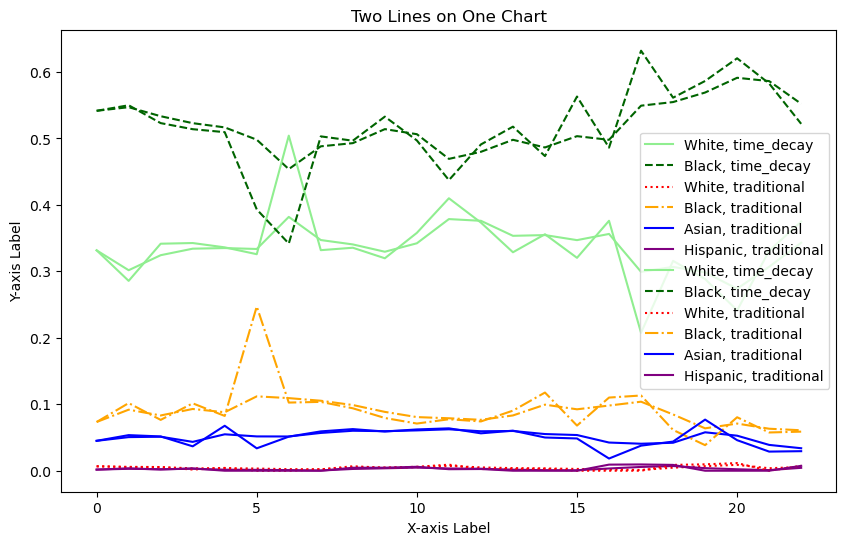

In [70]:
# plot the result of base_counters in each month:

a1 = [s[0] for s in base_cr_list]
a2 = [s[1] for s in base_cr_list]
a3 = [s[2] for s in base_cr_list]
a4 = [s[3] for s in base_cr_list]
a5 = [s[4] for s in base_cr_list]
a6 = [s[5] for s in base_cr_list]

b1 = [s[0] for s in seperate_cr_list]
b2 = [s[1] for s in seperate_cr_list]
b3 = [s[2] for s in seperate_cr_list]
b4 = [s[3] for s in seperate_cr_list]
b5 = [s[4] for s in seperate_cr_list]
b6 = [s[5] for s in seperate_cr_list]



x = range(len(base_counters))

# Plotting
plt.figure(figsize=(10, 6))  # Optional: Specifies the figure size
plt.plot(x, a1, label='White, time_decay', color="lightgreen")  # Plot the first line
plt.plot(x, a2, label='Black, time_decay', linestyle='--', color="darkgreen")  # Plot the second line with a different style
plt.plot(x, a3, label='White, traditional', linestyle=':', color="red") 
plt.plot(x, a4, label='Black, traditional', linestyle='-.', color="orange")
plt.plot(x, a5, label='Asian, traditional', linestyle='-', color="blue")
plt.plot(x, a6, label='Hispanic, traditional', linestyle='-', color="purple")

# print b list
plt.plot(x, b1, label='White, time_decay', color="lightgreen")  # Plot the first line
plt.plot(x, b2, label='Black, time_decay', linestyle='--', color="darkgreen")  # Plot the second line with a different style
plt.plot(x, b3, label='White, traditional', linestyle=':', color="red")
plt.plot(x, b4, label='Black, traditional', linestyle='-.', color="orange")
plt.plot(x, b5, label='Asian, traditional', linestyle='-', color="blue")
plt.plot(x, b6, label='Hispanic, traditional', linestyle='-', color="purple")




plt.title('Two Lines on One Chart')  # Chart title
plt.xlabel('X-axis Label')  # X-axis label
plt.ylabel('Y-axis Label')  # Y-axis label
plt.legend()  # Show legend
plt.show()


In [42]:
# compare baseline_uf and seperate_uf
for i in range(len(base_uf_list)):
    print(base_uf_list[i])
    print(seperate_uf_list[i])
    print("")

[False, False]
[False, False]

[False, False]
[True, False]

[False, False]
[False, False]

[False, False]
[False, False]

[False, False]
[False, False]

[False, False]
[False, False]

[False, False]
[False, False]

[False, False]
[False, False]

[False, False]
[False, False]

[False, False]
[False, False]

[False, False]
[False, False]

[False, False]
[False, False]

[False, False]
[False, False]

[False, False]
[False, False]

[False, False]
[False, False]

[False, False]
[False, False]

[False, False]
[False, False]

[True, False]
[True, False]

[False, False]
[False, False]

[True, False]
[True, False]

[True, False]
[True, False]

[False, False]
[False, False]

[False, False]
[False, False]
